In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class SOM:

    def __init__(self, n_input, map_dim=(10,10)) -> None:
        self.n_input = n_input              # Dimensión de los datos de entrada
        self.map_dim = map_dim              # Dimensión del mapa SOM (defoult 10x10)
        self.pesos = np.random.rand(map_dim[0], map_dim[1], n_input)

    def encontrar_neurona_ganadora(self, x):
        distancias = np.linalg.norm(self.pesos - x, axis=2)      # distancia euclidea
        index = np.unravel_index(np.argmin(distancias), distancias.shape)
        return distancias[index], index  # nos devuelve el indice para la matriz

    def actualizar_vecindad(self, index, k, distancia, coef_learn):
        for i in range(max(0,index[0]-k), min(index[0]+k+1, self.pesos.shape[0])):
            for j in range(max(0,index[1]-k), min(index[1]+k+1, self.pesos.shape[1])):
                self.pesos[i,j] += (coef_learn * distancia)

    def trn(self, data_set, vecindad = 5, epocs = [1000,1000,500], coef_learn=[0.5, 0.1]):
        # Entrenamiento del SOM ajuste grueso
        for _ in range(epocs[0]):
            for x in data_set:
                # Encontrar la neurona ganadora
                dist, ganadora = self.encontrar_neurona_ganadora(x)
                self.actualizar_vecindad(ganadora, 5, dist, coef_learn[0])
        
        # reduccion lineal
        coefs = np.linspace(coef_learn[0],coef_learn[1],epocs[1])
        vecindades = np.linspace(vecindad, 0, epocs[1]).astype(int)
        for epoc in range(epocs[1]):
            for x in data_set:
                # Encontrar la neurona ganadora
                dist, ganadora = self.encontrar_neurona_ganadora(x)
                self.actualizar_vecindad(ganadora, vecindades[epoc], dist, coefs[epoc])
        
        # Entrenamiento del SOM ajuste fino
        for _ in range(epocs[2]):
            for x in data_set:
                # Encontrar la neurona ganadora
                dist, ganadora = self.encontrar_neurona_ganadora(x)
                self.actualizar_vecindad(ganadora, 0, dist, coef_learn[1])



In [39]:
som = SOM(2,(1,2))

som.pesos

array([[[0.19318695, 0.55424586],
        [0.6411391 , 0.12676017]]])

In [40]:
# som.encontrar_neurona_ganadora([1,1])
dist = np.linalg.norm(som.pesos - [1, 1], axis=2)
print(dist)
print(som.distancia([1,1]))
print(np.unravel_index(np.argmin(dist), dist.shape))

[[0.92176138 0.94410219]]
[[0.92176138 0.94410219]]
(0, 0)


In [53]:
pesos = np.zeros([10,10])
coso = []

def vecindad(index, k, val):
    iv = range(max(0,index[0]-k), min(index[0]+k+1, pesos.shape[0]))
    jv = range(max(0,index[1]-k), min(index[1]+k+1, pesos.shape[1]))

    for i in range(-k,k+1):
        ronda = []
        for j in range(-k,k+1):
            # pesos[i,j] += val
            a = abs(i)+abs(j)
            ronda.append(1 if a<=k else 0)
        # coso.append(ronda)
        print(ronda)

vecindad((2,3), 1, 1)

# plt.imshow(pesos, cmap='viridis')
# plt.imshow(coso, cmap='viridis')
# plt.colorbar()

# print(pesos)

[0, 1, 0]
[1, 1, 1]
[0, 1, 0]


In [54]:
np.ones(10).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
a = np.array([
    [[1,2],[3,4]],
    [[5,6],[7,8]]
])

distancias = np.linalg.norm(a, axis=1)
print(distancias)



[[ 3.16227766  4.47213595]
 [ 8.60232527 10.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [3]:
def F2(x):
    if x.shape[0] == 2:
        return ((x[0]**2+x[1]**2)**0.25)*(np.sin(50*((x[0]**2+x[1]**2)**0.1))**2 + 1)
    else: 
        return ((x[:,0]**2+x[:,1]**2)**0.25)*(np.sin(50*((x[:,0]**2+x[:,1]**2)**0.1))**2 + 1)

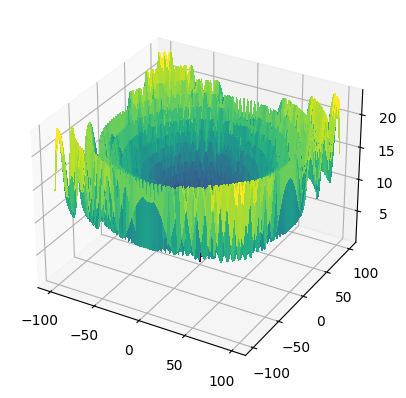

In [7]:
# Ejemplo GRAFICA 3d:
# Definimos una función de ejemplo que queremos minimizar
# f = lambda x: x[1]**2 + x[0]**2

# Punto inicial de búsqueda
# initial_x = np.array([1.0, 1.0])

# # Tasa de aprendizaje (puedes ajustar este valor)
# learning_rate = 0.1

# # Número de iteraciones (puedes ajustar este valor)
# num_iterations = 100

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X,Y = np.meshgrid(np.linspace(-100,100,2000), np.linspace(-100,100,2000))
Z = F2(np.array([X,Y]))

# Plot the surface.
# ax.scatter(minimizer[0],minimizer[1],minimum_value, marker='o', cmap='viridis')
# surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
# surf = ax.plot_wireframe(X, Y, Z)

# Customize the z axis.
# ax.set_zlim(-1.01, 5.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

AttributeError: 'numpy.float64' object has no attribute 'get_figure'

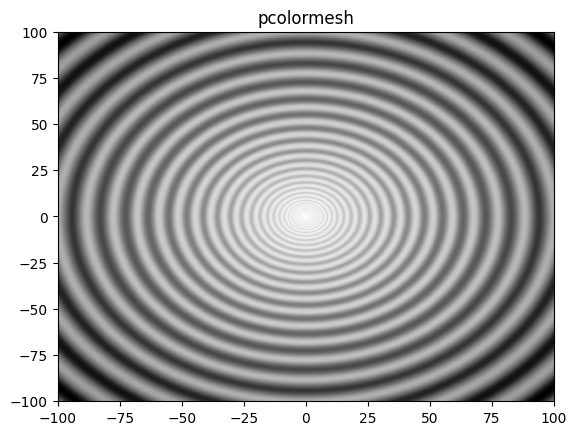

In [16]:
plt.subplot(1,1,1)

c = plt.pcolormesh(X,Y,Z, cmap='Greys', vmin=np.min(Z), vmax=np.max(Z))
plt.title('pcolormesh')
# set the limits of the plot to the limits of the data
plt.axis([X.min(), X.max(), Y.min(), Y.max()])
plt.show()